# 1 Columns - Definition

The time period for this data is between Jan 1st, 2010 to Dec 31st, 2015. Missing data are denoted as NA.   
No: row number   
year: year of data in this row   
month: month of data in this row   
day: day of data in this row    
hour: hour of data in this row   
season: season of data in this row    
PM: PM2.5 concentration (ug/m^3)    
DEWP: Dew Point (Celsius Degree)    
TEMP: Temperature (Celsius Degree)    
HUMI: Humidity (%)    
PRES: Pressure (hPa)    
cbwd: Combined wind direction    
Iws: Cumulated wind speed (m/s)    
precipitation: hourly precipitation (mm)    
Iprec: Cumulated precipitation (mm)

# 2 Load and prepare the data

## 2.1 Import Package

In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef,f1_score
# from sklearn.externals import joblib
from sklearn.preprocessing import LabelEncoder
import joblib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# my_path=%pwd
# df=pd.read_csv(f'{my_path}/raw/ChengduPM20100101_20151231.csv')
df = pd.read_csv ('ChengduPM20100101_20151231.csv', delimiter=',')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             52584 non-null  int64  
 1   year           52584 non-null  int64  
 2   month          52584 non-null  int64  
 3   day            52584 non-null  int64  
 4   hour           52584 non-null  int64  
 5   season         52584 non-null  int64  
 6   PM_Caotangsi   24420 non-null  float64
 7   PM_Shahepu     24594 non-null  float64
 8   PM_US Post     28900 non-null  float64
 9   DEWP           52055 non-null  float64
 10  HUMI           52049 non-null  float64
 11  PRES           52063 non-null  float64
 12  TEMP           52057 non-null  float64
 13  cbwd           52063 non-null  object 
 14  Iws            52051 non-null  float64
 15  precipitation  49629 non-null  float64
 16  Iprec          49629 non-null  float64
dtypes: float64(10), int64(6), object(1)
memory usage: 

In [5]:
df.describe()

,No,year,month,day,hour,season,PM_Caotangsi,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,24420.000000,24594.000000,28900.000000,52055.000000,52049.000000,52063.000000,52057.000000,52051.000000,49629.000000,49629.000000
mean,26292.500000,2012.499772,6.523962,15.726609,11.500000,2.491100,77.507002,75.555867,83.407612,12.274556,73.224697,1014.621985,17.698158,4.347654,0.107161,0.591557
std,15179.837614,1.707485,3.448452,8.798896,6.922252,1.116988,60.150955,60.337735,57.239585,7.531846,17.819088,8.111353,7.843607,6.423547,1.023369,5.117582
min,1.000000,2010.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,-16.000000,12.780000,991.000000,-3.000000,0.000000,0.000000,0.000000
25%,13146.750000,2011.000000,4.000000,8.000000,5.750000,1.000000,37.000000,35.000000,44.000000,6.000000,61.440000,1008.000000,11.000000,1.000000,0.000000,0.000000
50%,26292.500000,2012.000000,7.000000,16.000000,11.500000,2.000000,60.000000,57.000000,68.000000,13.000000,77.010000,1014.900000,18.000000,2.000000,0.000000,0.000000
75%,39438.250000,2014.000000,10.000000,23.000000,17.250000,3.000000,99.000000,97.000000,105.000000,19.000000,87.750000,1021.000000,24.000000,5.000000,0.000000,0.000000
max,52584.000000,2015.000000,12.000000,31.000000,23.000000,4.000000,662.000000,573.000000,688.000000,28.000000,100.000000,1041.000000,38.000000,120.000000,57.000000,169.400000


## 2.2 Data Cleaning

<AxesSubplot:xlabel='Feature', ylabel='Percent missing'>

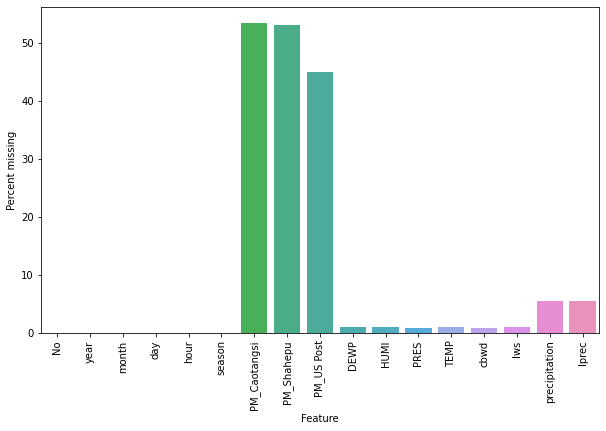

In [6]:
null_vals = df.isnull().sum()/len(df)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (10,6))
plt.xticks(rotation=90)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [7]:
# df_analysis only for analysis
df_analysis=df.drop(["No","PM_Caotangsi"],axis = 1)
df_analysis=df_analysis.dropna(axis=0, how="any")
df_analysis["PM_US Post"] = pd.cut(df_analysis["PM_US Post"],[-1,35,75,115,150,250,float("inf")],labels=[1,2,3,4,5,6])
df_analysis['PM_US Post']= df_analysis['PM_US Post'].astype('int64')
df_analysis['cbwd'] = df_analysis['cbwd'].replace('cv', 'SW')
enc = LabelEncoder()
df_analysis["cbwd"] = enc.fit_transform(df_analysis["cbwd"])
df_analysis.reset_index(drop=True, inplace=True)
df_analysis.head()

,year,month,day,hour,season,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2013,1,1,0,4,138.0,4,-4.0,64.42,1022.0,2.0,3,1.0,0.0,0.0
1,2013,1,1,1,4,159.0,4,-3.0,80.19,1022.0,0.0,3,1.0,0.0,0.0
2,2013,1,1,13,4,181.0,4,-9.0,26.99,1018.0,9.0,3,1.0,0.0,0.0
3,2013,1,1,14,4,184.0,3,-8.0,27.29,1017.0,10.0,3,2.0,0.0,0.0
4,2013,1,1,15,4,162.0,3,-7.0,29.48,1015.0,10.0,0,2.0,0.0,0.0


In [8]:
# drop the largest amount of null column among 2 PM locations and useless index column 
df_model=df.drop(["No","PM_Caotangsi"],axis = 1)

In [9]:
# drop any rows with null value
df_model=df_model.dropna(axis=0, how="any")

In [10]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21762 entries, 26304 to 52582
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           21762 non-null  int64  
 1   month          21762 non-null  int64  
 2   day            21762 non-null  int64  
 3   hour           21762 non-null  int64  
 4   season         21762 non-null  int64  
 5   PM_Shahepu     21762 non-null  float64
 6   PM_US Post     21762 non-null  float64
 7   DEWP           21762 non-null  float64
 8   HUMI           21762 non-null  float64
 9   PRES           21762 non-null  float64
 10  TEMP           21762 non-null  float64
 11  cbwd           21762 non-null  object 
 12  Iws            21762 non-null  float64
 13  precipitation  21762 non-null  float64
 14  Iprec          21762 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.7+ MB


In [11]:
df_model.head()

,year,month,day,hour,season,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
26304,2013,1,1,0,4,138.0,129.0,-4.0,64.42,1022.0,2.0,cv,1.0,0.0,0.0
26305,2013,1,1,1,4,159.0,135.0,-3.0,80.19,1022.0,0.0,cv,1.0,0.0,0.0
26317,2013,1,1,13,4,181.0,132.0,-9.0,26.99,1018.0,9.0,SW,1.0,0.0,0.0
26318,2013,1,1,14,4,184.0,100.0,-8.0,27.29,1017.0,10.0,SW,2.0,0.0,0.0
26319,2013,1,1,15,4,162.0,101.0,-7.0,29.48,1015.0,10.0,NE,2.0,0.0,0.0


## 2.3 Encoding Categorical Features

In [12]:
# change "cv"" in cbwd to "SW"
# This is a type from original dataset
df_model['cbwd'] = df_model['cbwd'].replace('cv', 'SW')
df_model['cbwd'].value_counts()

SW    14333
NW     3960
NE     2239
SE     1230
Name: cbwd, dtype: int64

In [13]:
enc = LabelEncoder()
df_model["cbwd"] = enc.fit_transform(df_model["cbwd"])

In [14]:
df_model.head()

,year,month,day,hour,season,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
26304,2013,1,1,0,4,138.0,129.0,-4.0,64.42,1022.0,2.0,3,1.0,0.0,0.0
26305,2013,1,1,1,4,159.0,135.0,-3.0,80.19,1022.0,0.0,3,1.0,0.0,0.0
26317,2013,1,1,13,4,181.0,132.0,-9.0,26.99,1018.0,9.0,3,1.0,0.0,0.0
26318,2013,1,1,14,4,184.0,100.0,-8.0,27.29,1017.0,10.0,3,2.0,0.0,0.0
26319,2013,1,1,15,4,162.0,101.0,-7.0,29.48,1015.0,10.0,0,2.0,0.0,0.0


In [15]:
# categorize the PM 2.5 into 6 categories
#    PM 2.5    -    Category
#   [0, 35]            1
#   (35, 75]           2
#  (75, 115]           3
# (115, 150]           4
# (150, 250]           5
# (250 -               6
df_model["PM_US Post"] = pd.cut(df_model["PM_US Post"],[-1,35,75,115,150,250,float("inf")],labels=[1,2,3,4,5,6])
df_model["PM_Shahepu"] = pd.cut(df_model["PM_Shahepu"],[-1,35,75,115,150,250,float("inf")],labels=[1,2,3,4,5,6])

In [16]:
df_model['PM_Shahepu']= df_model['PM_Shahepu'].astype('int64')
df_model['PM_US Post']= df_model['PM_US Post'].astype('int64')

In [17]:
df_model.describe()

,year,month,day,hour,season,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
count,21762.000000,21762.000000,21762.000000,21762.000000,21762.000000,21762.000000,21762.000000,21762.000000,21762.000000,21762.000000,21762.000000,21762.000000,21762.000000,21762.000000,21762.000000
mean,2014.111571,6.537451,15.728839,11.526882,2.581794,2.426661,2.639234,12.111571,72.005140,1015.087216,17.837561,2.270885,4.303281,0.117296,0.712834
std,0.794642,3.554288,8.781916,6.936452,1.115434,1.321863,1.266745,7.429280,18.155241,8.125900,7.740016,1.085731,6.404227,1.103678,6.308537
min,2013.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,-16.000000,12.780000,991.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,3.000000,8.000000,6.000000,2.000000,1.000000,2.000000,6.000000,60.270000,1009.000000,11.000000,1.000000,1.000000,0.000000,0.000000
50%,2014.000000,7.000000,16.000000,12.000000,3.000000,2.000000,2.000000,13.000000,75.670000,1015.000000,19.000000,3.000000,2.000000,0.000000,0.000000
75%,2015.000000,10.000000,23.000000,18.000000,4.000000,3.000000,3.000000,19.000000,87.190000,1021.000000,24.000000,3.000000,5.000000,0.000000,0.000000
max,2015.000000,12.000000,31.000000,23.000000,4.000000,6.000000,6.000000,28.000000,100.000000,1041.000000,38.000000,3.000000,93.000000,51.700000,169.400000


In [18]:
df_model.reset_index(drop=True, inplace=True)

In [19]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21762 entries, 0 to 21761
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           21762 non-null  int64  
 1   month          21762 non-null  int64  
 2   day            21762 non-null  int64  
 3   hour           21762 non-null  int64  
 4   season         21762 non-null  int64  
 5   PM_Shahepu     21762 non-null  int64  
 6   PM_US Post     21762 non-null  int64  
 7   DEWP           21762 non-null  float64
 8   HUMI           21762 non-null  float64
 9   PRES           21762 non-null  float64
 10  TEMP           21762 non-null  float64
 11  cbwd           21762 non-null  int64  
 12  Iws            21762 non-null  float64
 13  precipitation  21762 non-null  float64
 14  Iprec          21762 non-null  float64
dtypes: float64(7), int64(8)
memory usage: 2.5 MB


In [20]:
df_model.head()

,year,month,day,hour,season,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2013,1,1,0,4,4,4,-4.0,64.42,1022.0,2.0,3,1.0,0.0,0.0
1,2013,1,1,1,4,5,4,-3.0,80.19,1022.0,0.0,3,1.0,0.0,0.0
2,2013,1,1,13,4,5,4,-9.0,26.99,1018.0,9.0,3,1.0,0.0,0.0
3,2013,1,1,14,4,5,3,-8.0,27.29,1017.0,10.0,3,2.0,0.0,0.0
4,2013,1,1,15,4,5,3,-7.0,29.48,1015.0,10.0,0,2.0,0.0,0.0


## 2.4 Correlation plot

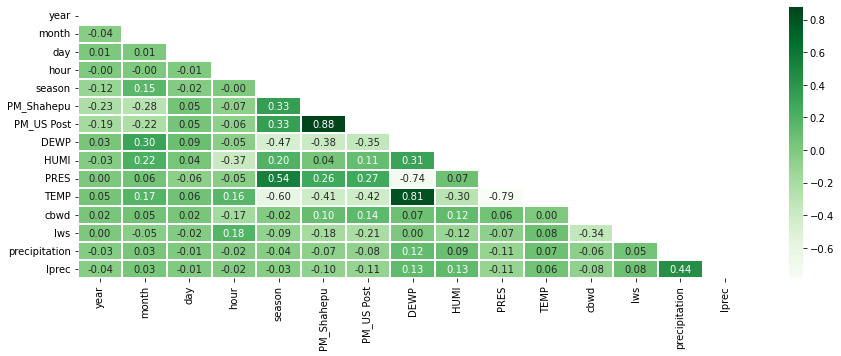

In [21]:
fig,ax = plt.subplots(figsize=(15,5))
mask=np.zeros_like(df_model.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(df_model.corr(),mask=mask,ax=ax,annot=True, linewidths=0.1, fmt='.2f',cmap="Greens")
plt.show()

###### PM_Shahepu, HUMI(Humidity), cbwd(Combined wind direction), lws(Cumulated wind speed) and TEMP(Temperature) are important to the result of PM_US Post

## 2.5 Converting the data to X and Y

In [22]:
Y = df_model["PM_US Post"]
X = df_model.drop("PM_US Post", axis=1)

## 2.6 Splitting the data into train, validation and test sets

In [23]:
from sklearn.model_selection import train_test_split
X_train_val,X_test,Y_train_val,Y_test = train_test_split(X,Y,test_size = 0.12, random_state=666)
print(X_train_val.shape, Y_train_val.shape, X_test.shape, Y_test.shape)

(19150, 14) (19150,) (2612, 14) (2612,)


## 2.7 Feature Selection

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [25]:
clf=ExtraTreesClassifier()
clf=clf.fit(X_train_val,Y_train_val)
clf.feature_importances_

array([0.03260491, 0.04973808, 0.09951275, 0.08900914, 0.0243012 ,
       0.27071957, 0.07532778, 0.07414538, 0.08496621, 0.07600148,
       0.02642863, 0.07096549, 0.01206802, 0.01421137])

In [26]:
model=SelectFromModel(clf,threshold=0.04,prefit=True)
model.transform(X_train_val)
feature_idx=model.get_support()
feature_name=X_train_val.columns[feature_idx]

In [27]:
print(feature_name)

Index(['month', 'day', 'hour', 'PM_Shahepu', 'DEWP', 'HUMI', 'PRES', 'TEMP',
       'Iws'],
      dtype='object')


In [28]:
# Splitting the data into train_validation and test sets
X_fs = df_model[list(feature_name)]
X_train_val_fs,X_test_fs,Y_train_val_fs,Y_test_fs = train_test_split(X_fs,Y,test_size = 0.12, random_state=666)
print(X_train_val_fs.shape, Y_train_val_fs.shape, X_test_fs.shape, Y_test_fs.shape)

(19150, 9) (19150,) (2612, 9) (2612,)


In [29]:
X_train_val_fs.reset_index(drop=True, inplace=True)
Y_train_val_fs.reset_index(drop=True, inplace=True)
X_fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21762 entries, 0 to 21761
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       21762 non-null  int64  
 1   day         21762 non-null  int64  
 2   hour        21762 non-null  int64  
 3   PM_Shahepu  21762 non-null  int64  
 4   DEWP        21762 non-null  float64
 5   HUMI        21762 non-null  float64
 6   PRES        21762 non-null  float64
 7   TEMP        21762 non-null  float64
 8   Iws         21762 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 1.5 MB


## 2.8 Feature Scaling

In [30]:
# Feature Scaling for X_train_val
X_train_val_fs_con = X_train_val_fs[['DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws']]
X_train_val_fs_cat = X_train_val_fs.drop(X_train_val_fs_con,axis = 1)
scaler = preprocessing.StandardScaler().fit(X_train_val_fs_con)
X_train_val_fs_con_sc = pd.DataFrame(scaler.transform(X_train_val_fs_con))
X_train_val_fs_con_sc.columns = ['DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws']
print(X_train_val_fs_con_sc.shape,X_train_val_fs_cat.shape)

(19150, 5) (19150, 4)


In [31]:
X_train_val_fs_sc = pd.concat([X_train_val_fs_cat,X_train_val_fs_con_sc],axis = 1)
print(X_train_val_fs_sc.shape)
X_train_val_fs_sc.head()

(19150, 9)


,month,day,hour,PM_Shahepu,DEWP,HUMI,PRES,TEMP,Iws
0,1,26,20,5,-1.626058,-1.707442,0.849784,-0.624230,-0.517817
1,10,2,10,2,0.124058,-0.427716,0.357777,0.278835,0.577446
2,8,30,0,2,1.201053,0.918061,-0.503234,0.665863,-0.204885
3,3,2,13,3,-1.626058,-1.555526,1.833796,-0.753239,-0.361351
4,8,19,21,2,1.335677,0.375347,-0.995240,1.052891,-0.517817


In [32]:
# Splitting train, validation data
X_train_fs_sc,X_val_fs_sc,Y_train_fs_sc,Y_val_fs_sc = train_test_split(X_train_val_fs_sc,Y_train_val_fs,test_size = 0.14, random_state=666)
print(X_train_fs_sc.shape, Y_train_fs_sc.shape, X_val_fs_sc.shape, Y_val_fs_sc.shape)

(16468, 9) (16468,) (2682, 9) (2682,)


In [33]:
# Feature Scaling for X_test
X_test_fs.reset_index(drop=True, inplace=True)
Y_test_fs.reset_index(drop=True, inplace=True)
X_test_fs_con = X_test_fs[['DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws']]
X_test_fs_cat = X_test_fs.drop(X_test_fs_con,axis = 1)
X_test_fs_con_sc = pd.DataFrame(scaler.transform(X_test_fs_con))
X_test_fs_con_sc.columns = ['DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws']
print(X_test_fs_con_sc.shape,X_test_fs_cat.shape)

(2612, 5) (2612, 4)


In [34]:
X_test_fs_sc = pd.concat([X_test_fs_cat,X_test_fs_con_sc],axis = 1)
print(X_test_fs_sc.shape)
X_test_fs_sc.head()

(2612, 9)


,month,day,hour,PM_Shahepu,DEWP,HUMI,PRES,TEMP,Iws
0,11,17,20,3,-0.279815,0.009868,1.095787,-0.366211,0.577446
1,7,24,14,1,0.662556,-1.709644,-0.872239,1.826946,-0.361351
2,4,7,0,2,0.124058,0.300490,0.234776,-0.108193,-0.361351
3,10,22,17,1,0.662556,0.607074,-0.257231,0.278835,1.359777
4,5,26,1,2,0.662556,0.334616,-0.626235,0.407844,-0.361351


# 3 Model Selection

## 3.1 Function Definition

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools

In [36]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [37]:
def model_selection(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train,y_train)
    y_test_pred=clf.predict(x_test)
    score=clf.score(x_test,y_test)
    mae=mean_absolute_error(y_test,y_test_pred)
    r2=r2_score(y_test,y_test_pred)
    print("Model Evaluation over Test Data \nAccuracy Score: %f;  Mean Absolute Error: %f;  R**2 Score: %f" %(score,mae,r2))
    cfm = confusion_matrix(y_test, y_test_pred)
    plot_confusion_matrix(cfm, normalize = False, target_names = ['1','2','3','4','5','6'],title = "Confusion Matrix over Test Data")

In [38]:
def test_grid_search(clf, x_test, y_test):
    y_test_pred=clf.predict(x_test)
    score=clf.score(x_test,y_test)
    mae=mean_absolute_error(y_test,y_test_pred)
    r2=r2_score(y_test,y_test_pred)
    print("Model Evaluation over Test Data After Grid Search \nAccuracy Score: %f;  Mean Absolute Error: %f;  R**2 Score: %f" %(score,mae,r2))
    cfm = confusion_matrix(y_test, y_test_pred)
    plot_confusion_matrix(cfm, normalize = False, target_names = ['1','2','3','4','5','6'],title = "Confusion Matrix over Test Data")

## 3.2 KNN

In [39]:
from sklearn import neighbors
KNN_clf = KNeighborsClassifier()

Model Evaluation over Test Data 
Accuracy Score: 0.637443;  Mean Absolute Error: 0.402374;  R**2 Score: 0.702589


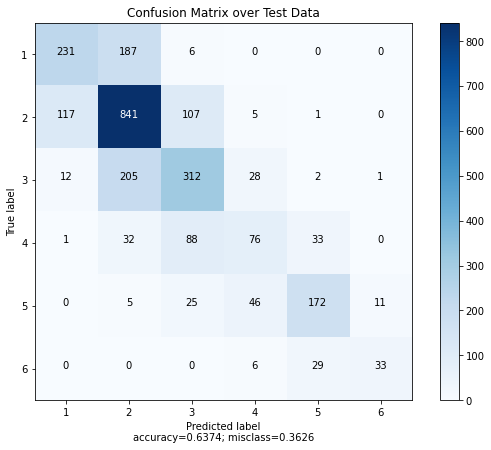

In [40]:
model_selection(KNN_clf, X_train_fs_sc, Y_train_fs_sc,X_test_fs_sc,Y_test_fs)

### 3.2.1 KNN GridSearch

In [41]:
param_grid = [
    {
    'weights':['uniform'],
    'n_neighbors':[i for i in range(1,10)]
    },
    {
    'weights':['distance'],
    'n_neighbors':[i for i in range(1,10)],
    'p':[i for i in range(1,3)]
    }
]

In [42]:
KNN_clf_grid = KNeighborsClassifier()
grid_search_knn = GridSearchCV(KNN_clf_grid, param_grid=param_grid,n_jobs=-1)
grid_search_knn.fit(X_train_val_fs_sc,Y_train_val_fs)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'p': [1, 2], 'weights': ['distance']}])

In [43]:
grid_search_knn.best_params_

{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

Model Evaluation over Test Data After Grid Search 
Accuracy Score: 0.752680;  Mean Absolute Error: 0.261868;  R**2 Score: 0.821320


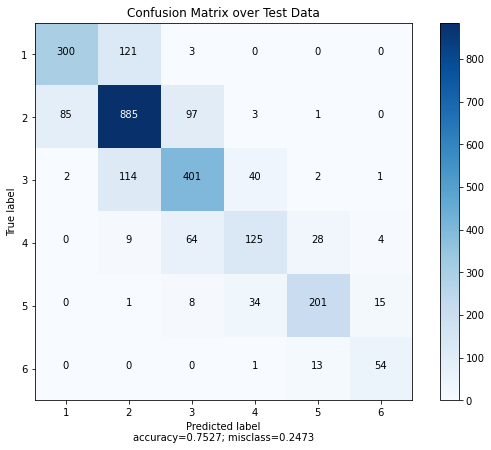

In [44]:
best_knn_clf=grid_search_knn.best_estimator_
test_grid_search(best_knn_clf, X_test_fs_sc, Y_test_fs)

## 3.3 Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

Model Evaluation over Test Data 
Accuracy Score: 0.736217;  Mean Absolute Error: 0.276417;  R**2 Score: 0.815256


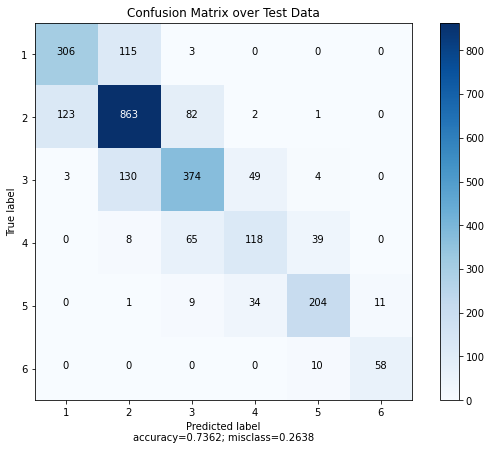

In [46]:
rf_clf=RandomForestClassifier(n_jobs = -1,bootstrap = True, random_state=666)
model_selection(rf_clf,X_train_fs_sc, Y_train_fs_sc,X_test_fs_sc,Y_test_fs)

### 3.3.1 Random Forest GridSearch

In [47]:
param_grid = [
    {
        'max_depth': [i for i in range(1,6)],
        'n_estimators': [i for i in range(80,130)],
        'bootstrap': [True],
        'random_state': [666]
    }
]

In [48]:
rf_clf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf_clf_grid,param_grid,cv=3,n_jobs=-1)
grid_search_rf.fit(X_train_val_fs_sc,Y_train_val_fs)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'bootstrap': [True], 'max_depth': [1, 2, 3, 4, 5],
                          'n_estimators': [80, 81, 82, 83, 84, 85, 86, 87, 88,
                                           89, 90, 91, 92, 93, 94, 95, 96, 97,
                                           98, 99, 100, 101, 102, 103, 104, 105,
                                           106, 107, 108, 109, ...],
                          'random_state': [666]}])

Model Evaluation over Test Data After Grid Search 
Accuracy Score: 0.610260;  Mean Absolute Error: 0.420368;  R**2 Score: 0.704222


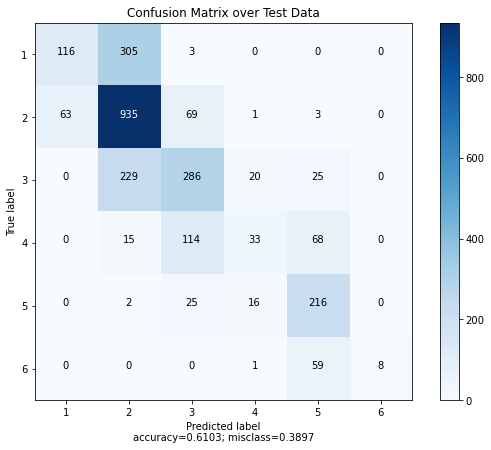

In [49]:
best_rf_clf=grid_search_rf.best_estimator_
test_grid_search(best_rf_clf, X_test_fs_sc, Y_test_fs)

## 3.4 Gradient Boosting

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

Model Evaluation over Test Data 
Accuracy Score: 0.658116;  Mean Absolute Error: 0.367534;  R**2 Score: 0.742944


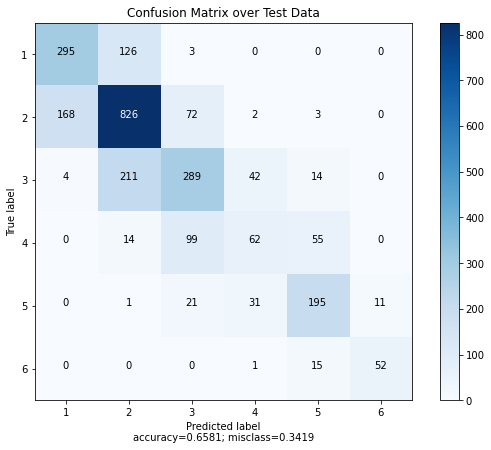

In [51]:
gb_clf = GradientBoostingClassifier(random_state=666)
model_selection(gb_clf, X_train_fs_sc, Y_train_fs_sc,X_test_fs_sc,Y_test_fs)

### 3.4.1 Gradient Boosting GridSearch

In [52]:
param_grid = [
    {
        'max_features': [i for i in range(1,4)],
        'max_depth': [i for i in range(1,5)],
        'n_estimators':[i for i in range(20,35)],
        'random_state': [666]
    }
]

In [53]:
gb_clf_grid = GradientBoostingClassifier()
grid_search_gb = GridSearchCV(gb_clf_grid,param_grid,cv=3,n_jobs=-1)
grid_search_gb.fit(X_train_val_fs_sc,Y_train_val_fs)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [1, 2, 3, 4], 'max_features': [1, 2, 3],
                          'n_estimators': [20, 21, 22, 23, 24, 25, 26, 27, 28,
                                           29, 30, 31, 32, 33, 34],
                          'random_state': [666]}])

In [54]:
grid_search_gb.best_params_

{'max_depth': 4, 'max_features': 3, 'n_estimators': 34, 'random_state': 666}

Model Evaluation over Test Data After Grid Search 
Accuracy Score: 0.653522;  Mean Absolute Error: 0.374426;  R**2 Score: 0.735480


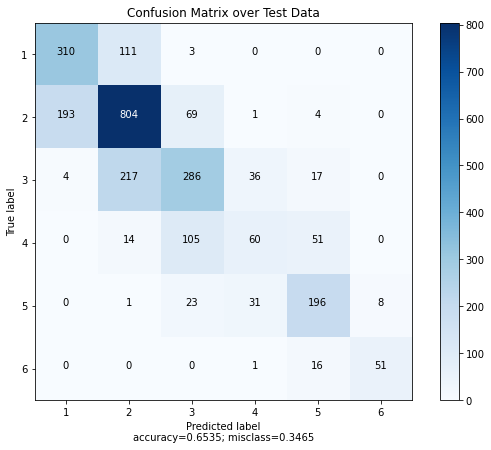

In [55]:
best_gd_clf=grid_search_gb.best_estimator_
test_grid_search(best_gd_clf, X_test_fs_sc, Y_test_fs)

# 4. Discussion

## 4.1 Correlation Analysis

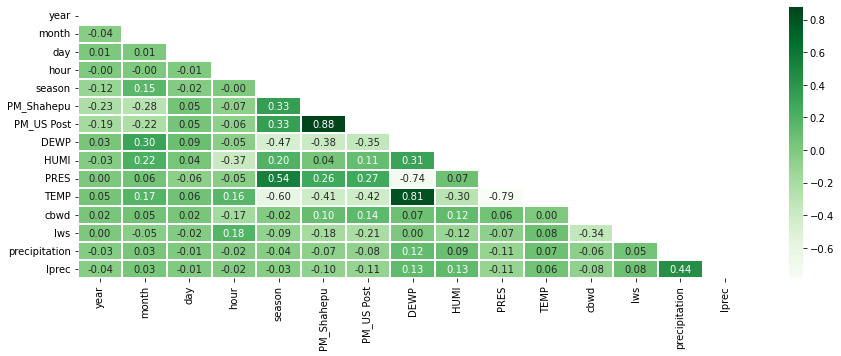

In [56]:
fig,ax = plt.subplots(figsize=(15,5))
mask = np.zeros_like(df_model.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(df_model.corr(),mask=mask,ax = ax, annot=True, linewidths=0.1,fmt='.2f', cmap="Greens")
plt.show()

## 4.2 Trend

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             52584 non-null  int64  
 1   year           52584 non-null  int64  
 2   month          52584 non-null  int64  
 3   day            52584 non-null  int64  
 4   hour           52584 non-null  int64  
 5   season         52584 non-null  int64  
 6   PM_Caotangsi   24420 non-null  float64
 7   PM_Shahepu     24594 non-null  float64
 8   PM_US Post     28900 non-null  float64
 9   DEWP           52055 non-null  float64
 10  HUMI           52049 non-null  float64
 11  PRES           52063 non-null  float64
 12  TEMP           52057 non-null  float64
 13  cbwd           52063 non-null  object 
 14  Iws            52051 non-null  float64
 15  precipitation  49629 non-null  float64
 16  Iprec          49629 non-null  float64
dtypes: float64(10), int64(6), object(1)
memory usage: 

In [58]:
df.head(10)

,No,year,month,day,hour,season,PM_Caotangsi,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,4.0,81.20,1022.0,7.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,4.0,86.99,1022.0,6.0,cv,1.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,4.0,86.99,1021.0,6.0,cv,1.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,3.0,86.89,1021.0,5.0,cv,1.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,2.0,86.79,1021.0,4.0,cv,1.0,0.0,0.0
5,6,2010,1,1,5,4,NaN,NaN,NaN,2.0,93.13,1020.0,3.0,cv,1.0,0.0,0.0
6,7,2010,1,1,6,4,NaN,NaN,NaN,2.0,93.13,1020.0,3.0,cv,1.0,0.0,0.0
7,8,2010,1,1,7,4,NaN,NaN,NaN,2.0,86.79,1020.0,4.0,cv,1.0,0.0,0.0
8,9,2010,1,1,8,4,NaN,NaN,NaN,2.0,93.13,1021.0,3.0,cv,1.0,0.0,0.0
9,10,2010,1,1,9,4,NaN,NaN,NaN,3.0,93.19,1021.0,4.0,cv,1.0,0.0,0.0


In [59]:
#DatetimeIndex 
#PeriodIndex 
#seperated in time intervals with pandas

period = pd.PeriodIndex(year=df["year"],month=df["month"],day=df["day"],hour=df["hour"],freq="H")
df["datetime"] = period
df.set_index("datetime",inplace=True)
df

,No,year,month,day,hour,season,PM_Caotangsi,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
datetime,,,,,,,,,,,,,,,,,
2010-01-01 00:00,1,2010,1,1,0,4,NaN,NaN,NaN,4.0,81.20,1022.0,7.0,cv,1.0,0.0,0.0
2010-01-01 01:00,2,2010,1,1,1,4,NaN,NaN,NaN,4.0,86.99,1022.0,6.0,cv,1.0,0.0,0.0
2010-01-01 02:00,3,2010,1,1,2,4,NaN,NaN,NaN,4.0,86.99,1021.0,6.0,cv,1.0,0.0,0.0
2010-01-01 03:00,4,2010,1,1,3,4,NaN,NaN,NaN,3.0,86.89,1021.0,5.0,cv,1.0,0.0,0.0
2010-01-01 04:00,5,2010,1,1,4,4,NaN,NaN,NaN,2.0,86.79,1021.0,4.0,cv,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00,52580,2015,12,31,19,4,176.0,225.0,262.0,7.0,87.28,1027.0,9.0,NW,2.0,0.0,0.0
2015-12-31 20:00,52581,2015,12,31,20,4,146.0,181.0,218.0,7.0,87.28,1028.0,9.0,NW,4.0,0.0,0.0
2015-12-31 21:00,52582,2015,12,31,21,4,162.0,175.0,213.0,7.0,87.28,1028.0,9.0,cv,1.0,0.0,0.0


In [60]:
data = df["PM_US Post"].dropna()
data

datetime
2012-05-14 14:00     46.0
2012-06-04 23:00     69.0
2012-06-05 15:00     98.0
2012-06-05 16:00     89.0
2012-06-05 17:00     66.0
                    ...  
2015-12-31 19:00    262.0
2015-12-31 20:00    218.0
2015-12-31 21:00    213.0
2015-12-31 22:00    236.0
2015-12-31 23:00    249.0
Freq: H, Name: PM_US Post, Length: 28900, dtype: float64

### 4.2.1 General plot

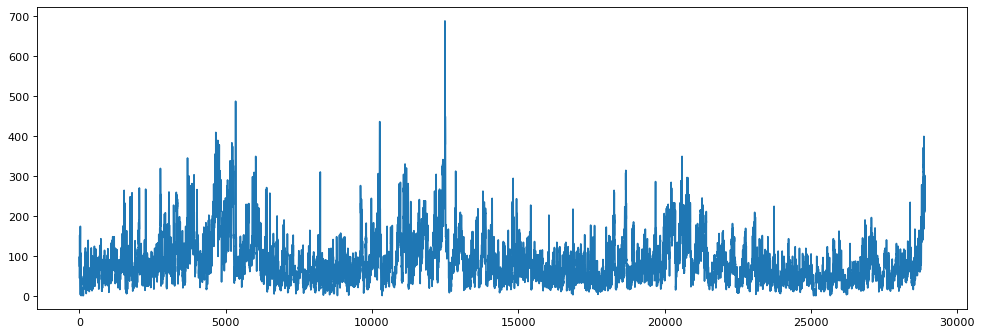

In [61]:
import matplotlib.pyplot as plt 
_x = data.index
_y = data.values
plt.figure(figsize=(15,5),dpi=80)
plt.plot(range(len(_x)),_y)
#plt.xticks(range(0,len(_x),20),list(_x)[::20])
plt.show()

### 4.2.2 Monthly

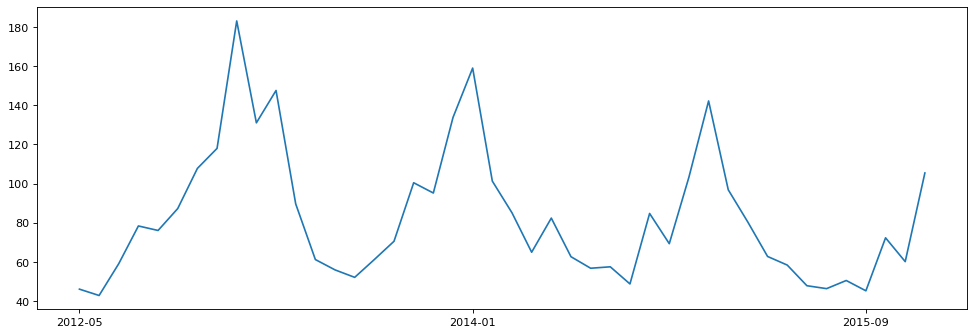

In [62]:
df2 = df.resample("M").mean()
data = df2["PM_US Post"].dropna()
_x = data.index
_y = data.values
plt.figure(figsize=(15,5),dpi=80)
plt.plot(range(len(_x)),_y)
plt.xticks(range(0,len(_x),20),list(_x)[::20])
plt.show()

### 4.2.3 Weekly(7 days)

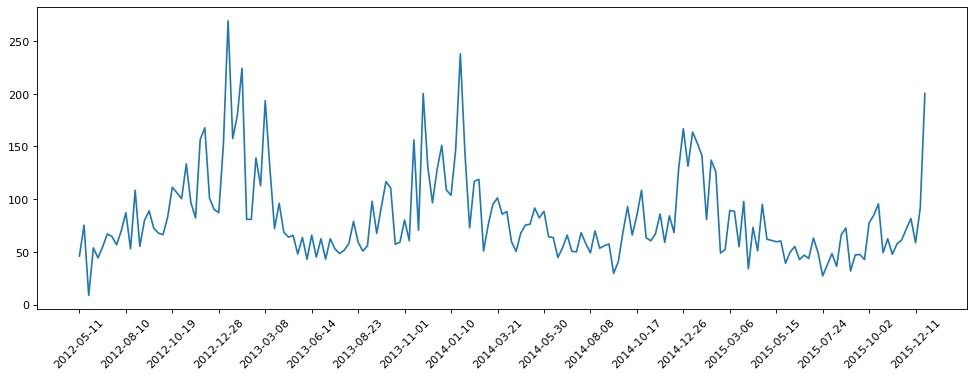

In [63]:
df3 = df.resample("7D").mean()
data = df3["PM_US Post"].dropna()
_x = data.index
_y = data.values
plt.figure(figsize=(15,5),dpi=80)
plt.plot(range(len(_x)),_y)
plt.xticks(range(0,len(_x),10),list(_x)[::10],rotation=45)
plt.show()

### 4.2.4 Daily

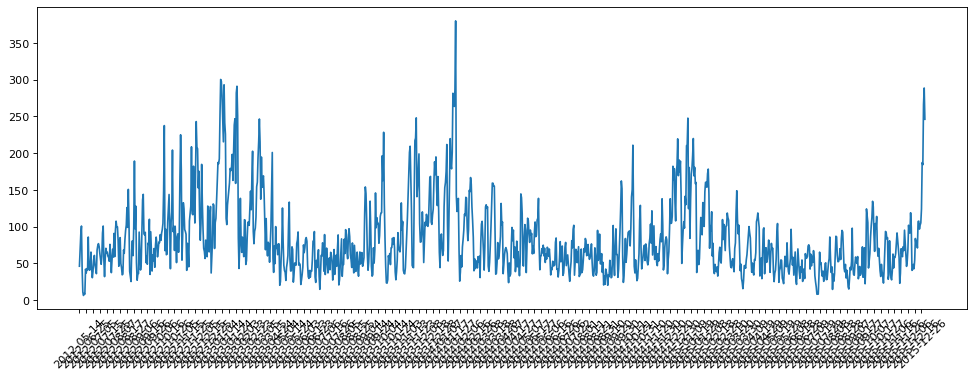

In [112]:
df4 = df.resample("1D").mean()
data = df4["PM_US Post"].dropna()
_x = data.index
_y = data.values
plt.figure(figsize=(15,5),dpi=80)
plt.plot(range(len(_x)),_y)
plt.xticks(range(0,len(_x),10),list(_x)[::10],rotation=45)
plt.show()

### 4.2.5 Hourly trend

#### 4.2.5.1 Hourly trend on a winter day

In [134]:
df5 = df.resample("1H").mean()
data = df5["PM_US Post"].dropna()
winter_hour_data = data[20251:20276]
winter_hour_data

datetime
2015-01-01 00:00    152.0
2015-01-01 01:00    130.0
2015-01-01 02:00    125.0
2015-01-01 03:00    131.0
2015-01-01 04:00    133.0
2015-01-01 05:00    133.0
2015-01-01 06:00    131.0
2015-01-01 07:00    142.0
2015-01-01 08:00    154.0
2015-01-01 09:00    153.0
2015-01-01 10:00    172.0
2015-01-01 11:00    177.0
2015-01-01 12:00    195.0
2015-01-01 13:00    208.0
2015-01-01 14:00    210.0
2015-01-01 15:00    206.0
2015-01-01 16:00    196.0
2015-01-01 17:00    180.0
2015-01-01 18:00    190.0
2015-01-01 19:00    189.0
2015-01-01 20:00    175.0
2015-01-01 21:00    195.0
2015-01-01 22:00    201.0
2015-01-01 23:00    184.0
2015-01-02 00:00    163.0
Freq: H, Name: PM_US Post, dtype: float64

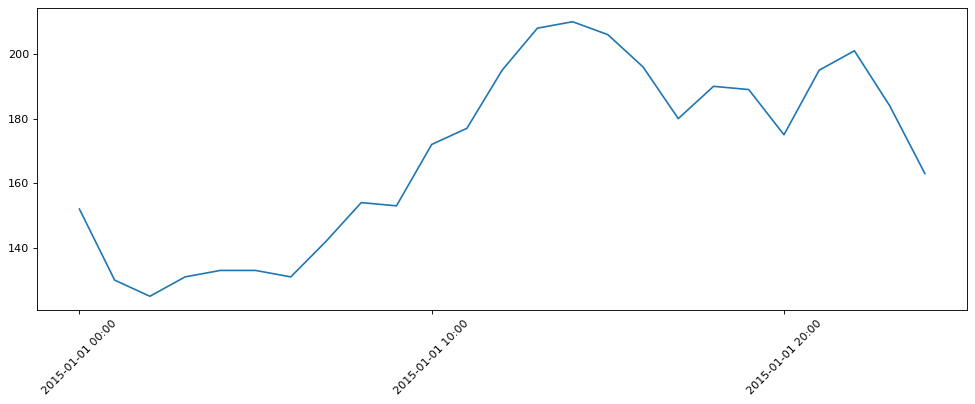

In [135]:
_x = winter_hour_data.index
_y = winter_hour_data.values
plt.figure(figsize=(15,5),dpi=80)
plt.plot(range(len(_x)),_y)
plt.xticks(range(0,len(_x),10),list(_x)[::10],rotation=45)
plt.show()

#### 4.2.5.2 Hourly trend on a summer day

In [136]:
summer_hour_data = data[24576:24600]
summer_hour_data

datetime
2015-07-01 01:00    37.0
2015-07-01 02:00    42.0
2015-07-01 03:00    37.0
2015-07-01 04:00    28.0
2015-07-01 05:00    33.0
2015-07-01 06:00    27.0
2015-07-01 07:00    30.0
2015-07-01 08:00    32.0
2015-07-01 09:00    28.0
2015-07-01 10:00    38.0
2015-07-01 11:00    37.0
2015-07-01 12:00    51.0
2015-07-01 13:00    59.0
2015-07-01 14:00    52.0
2015-07-01 15:00    41.0
2015-07-01 16:00    40.0
2015-07-01 17:00    30.0
2015-07-01 18:00    34.0
2015-07-01 19:00    41.0
2015-07-01 20:00    37.0
2015-07-01 21:00    38.0
2015-07-01 22:00    42.0
2015-07-01 23:00    45.0
2015-07-02 00:00    37.0
Freq: H, Name: PM_US Post, dtype: float64

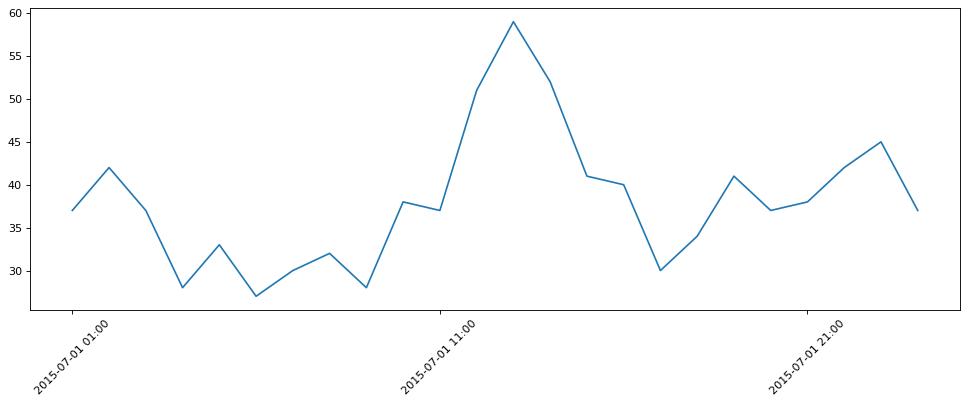

In [137]:
_x = summer_hour_data.index
_y = summer_hour_data.values
plt.figure(figsize=(15,5),dpi=80)
plt.plot(range(len(_x)),_y)
plt.xticks(range(0,len(_x),10),list(_x)[::10],rotation=45)
plt.show()